In [3]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
from Model import Model
from PlaceInputs import PlaceInputs
from utils import *
import configs
import pickle
import os

# Collect Stats

In [2]:
engram_dir = '/mnt/smb/locker/aronov-locker/Ching/barcodes2/'
exp_dir = engram_dir + 'pred_stats/'

In [5]:
results = {}
for file in os.listdir(exp_dir):
    with open(exp_dir + file, 'rb') as f:
        _results = pickle.load(f)
        for k in _results.keys():
            if k not in results.keys():
                results[k] = []
            results[k].extend(_results[k])

# Iterate over seeds

In [7]:
results.keys()

dict_keys(['shifts', 'w1', 'w2', 'seed'])

In [8]:
df = pd.DataFrame(results)

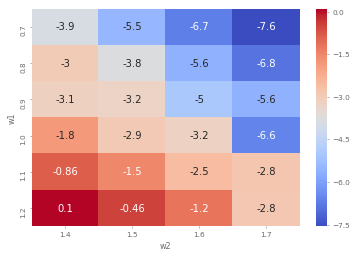

In [10]:
_df = df.copy()
_df = _df.groupby(['w1', 'w2']).mean().reset_index()
heatmap_data = _df.pivot('w1', 'w2', 'shifts')
fig, ax = plt.subplots()
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm')
plt.show()

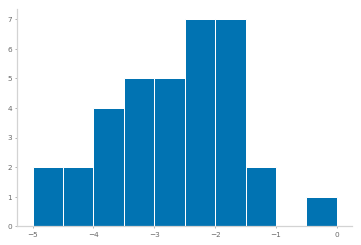

In [11]:
_df = df.copy()
_df = _df[(_df['w1']==1) & (df['w2']==1.5)]
plt.figure()
plt.hist(_df['shifts'].tolist())
plt.show()